In [10]:
import pandas as pd
import re
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/Game_of_Thrones_jon_snow_data.csv', low_memory=False)
df.head()

,text
0,JON: Go on. Father’s watching.\r\n
1,JON: And your mother.\r\n
2,"JON: Don’t think too much, Bran.\r\n"
3,"JON/ROBB: Quick, Bran, faster!\r\n"
4,JON (to BRAN): Don’t look away.\r\n


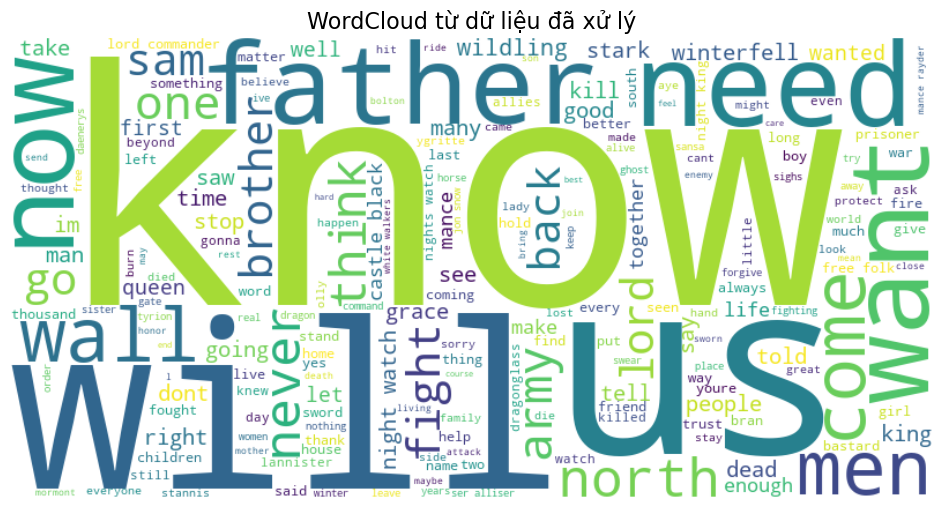

In [8]:
def clean_text(text):
    text = re.sub(r'^[^:]*:', '', text, flags = re.IGNORECASE)
    text = text.replace('\r', ' ').replace('\n', ' ')
    text = re.sub(r'[^a-zA -ZÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚĂĐĨŨƠàáâãèéêìíòóôõùúăđĩũơƯĂẠẢẤẦẨẪẬẮẰẲẴẶẸẺẼỀỀỂẾưăạảấầẩẫậắằẳẵặẹẻẽềềểếỄỆỈỊỌỎỐỒỔỖỘỚỜỞỠỢỤỦỨỪễệỉịọỏốồổỗộớờởỡợụủứừỬỮỰỲỴÝỶỸửữựỳỵýỷỹ\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned'] = df['text'].astype(str).apply(clean_text)
text = ' '.join(df['cleaned'])

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('WordCloud từ dữ liệu đã xử lý', fontsize =16)
plt.show()

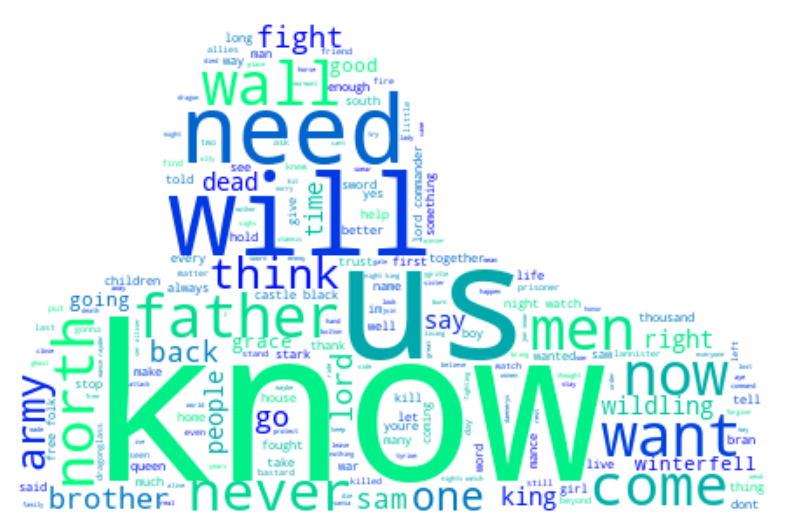

In [17]:
mask = np.array(Image.open('data/jon-snow.jpg'))

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    mask=mask,
    contour_width=0,
    contour_color=None,
    colormap='winter'  
).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()